In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("raw_data\crop_yield.csv")

# Understanding the data

## Size of data

In [3]:
data.shape 

(19689, 10)

## How data looks like

In [4]:
data.head() 

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
data.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [6]:
data.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
15692,Wheat,2017,Rabi,Maharashtra,1137731.5,1884842,1129.5,1.791244e+08,432337.97,1.505484
16886,Bajra,2019,Kharif,Madhya Pradesh,339656.0,785624,1446.7,5.833931e+07,125672.72,1.273404
15924,Wheat,2017,Rabi,Uttar Pradesh,9752941.0,35645666,652.1,1.535503e+09,3706117.58,3.649867
8964,Tobacco,2004,Whole Year,Chhattisgarh,33.0,17,1122.8,3.575220e+03,6.93,0.680000
15074,Maize,2016,Kharif,Mizoram,5481.0,8443,2626.8,8.399632e+05,1918.35,1.665000


## dtype of columns

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


#### insights
- area can be converted to int data type

In [8]:
data.isnull().sum() #missing values

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

## Mathematical representation of data

In [9]:
data.describe() 

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


## check duplicate values

In [10]:
data.duplicated().sum() 

np.int64(0)

## column names

In [11]:
data.columns 

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

## Unique values in each Column

In [12]:
data.nunique() 

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

In [13]:
data["State"].unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [14]:
data["Season"].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [15]:
data["Crop_Year"].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [16]:
data["Crop"].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

## correlation between columns

In [17]:
data.select_dtypes(include=['float64','int64']).corr() 

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


<Axes: >

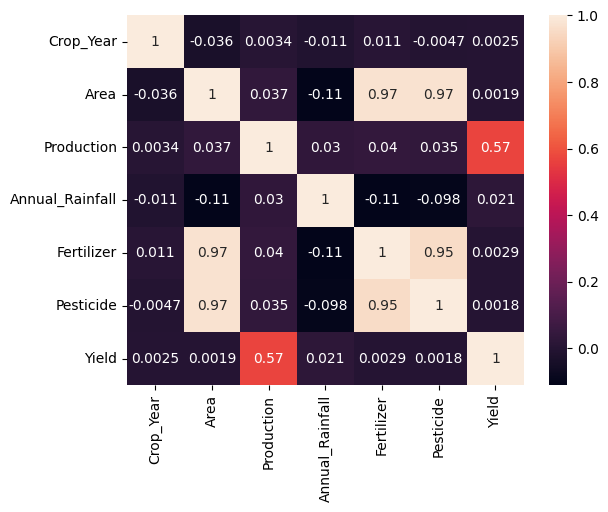

In [18]:
sns.heatmap(data.select_dtypes(include=['float64','int64']).corr(), annot=True)

In [19]:
data.select_dtypes(include=['float64','int64']).corr()['Yield']

Crop_Year          0.002539
Area               0.001858
Production         0.570809
Annual_Rainfall    0.020761
Fertilizer         0.002862
Pesticide          0.001782
Yield              1.000000
Name: Yield, dtype: float64

# univariate analysis

In [20]:
data.sample(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4414,Cashewnut,2015,Kharif,Andhra Pradesh,109823.0,40835,940.7,17342149.93,36241.59,0.379167
6402,Sweet potato,1998,Whole Year,Bihar,17925.0,193770,1332.5,1770990.00,5198.25,11.044750
10414,Arhar/Tur,2007,Kharif,Tripura,1221.0,882,2831.8,162881.40,195.36,0.717500
647,Cotton(lint),2000,Kharif,Kerala,3847.0,6209,2412.6,377659.99,1000.22,1.610000
17741,Cotton(lint),2005,Kharif,Uttar Pradesh,4366.0,889,751.9,523570.72,916.86,0.185833
17477,Wheat,2001,Rabi,Delhi,26114.0,91660,611.9,2667022.82,6789.64,3.510000
3965,Jowar,2013,Kharif,Karnataka,167856.0,238840,1235.6,24253513.44,45321.12,1.338636
5779,Ginger,2019,Kharif,Andhra Pradesh,294.0,633,899.2,50497.44,108.78,1.922000
12617,Other Kharif pulses,2012,Kharif,Gujarat,18100.0,7200,460.6,2729480.00,5611.00,0.394706
14541,Castor seed,2015,Rabi,Telangana,601.0,213,747.9,94903.91,198.33,0.338000


## categorical data

### countplot

<Axes: xlabel='Crop'>

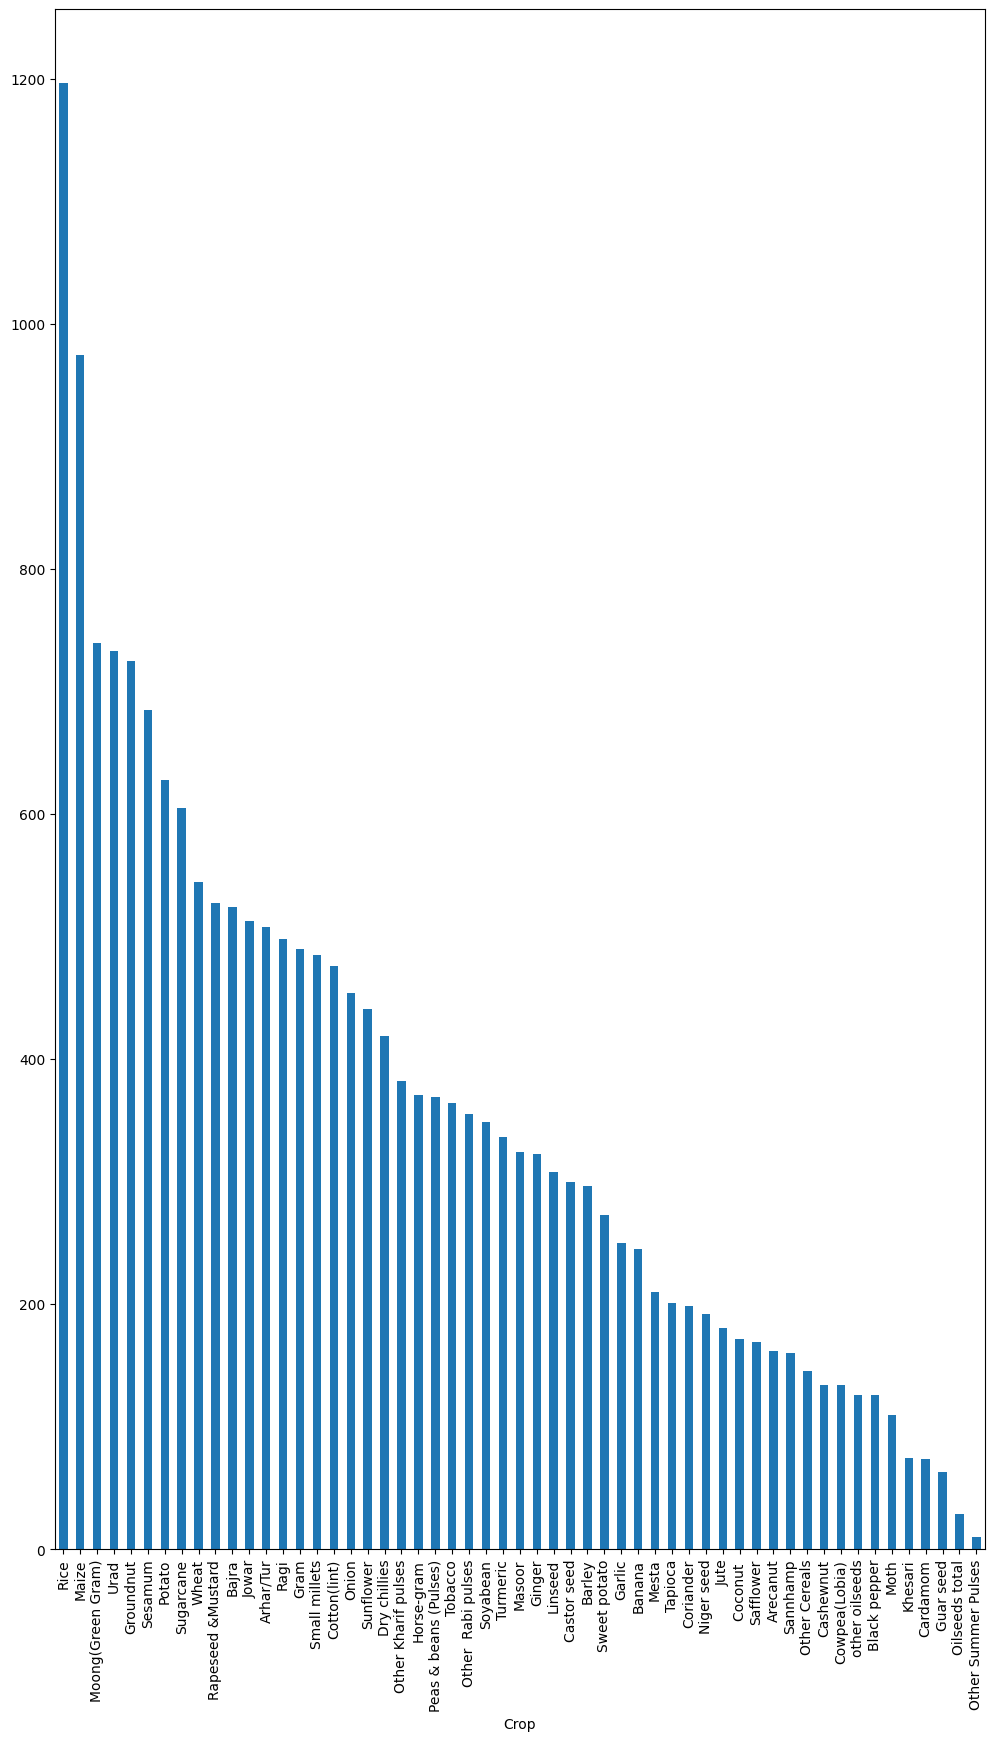

In [21]:
plt.figure(figsize=(12, 20))
# sns.countplot(data['Crop']) 
data['Crop'].value_counts().plot(kind='bar')

#### Insights
- Rice and Maize appears the most number of times in the given data set

<Axes: xlabel='count', ylabel='Season'>

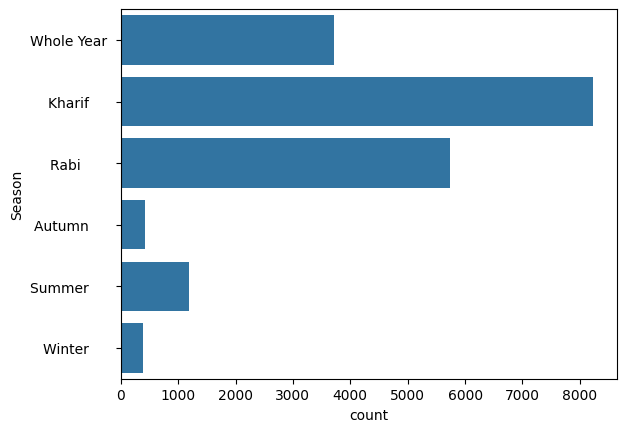

In [22]:
sns.countplot(data['Season'])

<Axes: xlabel='State'>

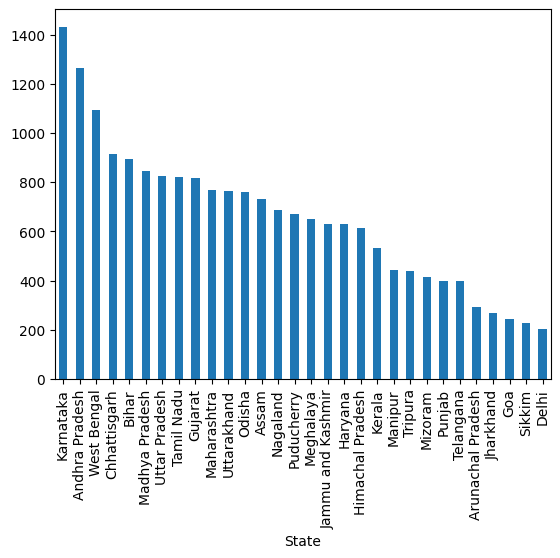

In [23]:
# sns.countplot(data['State'])
data['State'].value_counts().plot(kind='bar')

### PieChart

<Axes: ylabel='count'>

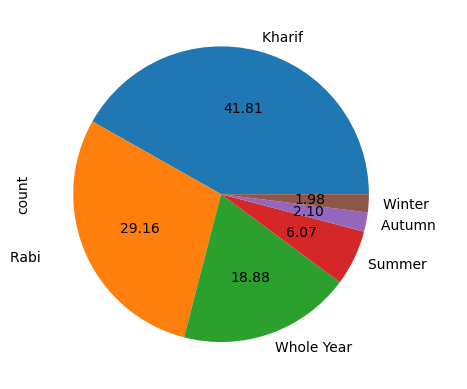

In [24]:
data['Season'].value_counts().plot(kind='pie', autopct='%.2f')

#### Insights
- Kharif season appears the most number of times

## numerical data

### Histogram

(array([ 503.,  508.,  841., 1129., 1643., 2023., 2051., 1827., 2137.,
        1245., 1032.,  800.,  356.,  498.,  400.,  292.,  284.,  336.,
         250.,  126.,  169.,  302.,  138.,   75.,  115.,   90.,   35.,
           7.,  174.,    0.,   31.,   30.,   38.,   48.,    0.,   49.,
           0.,    0.,    0.,    0.,    0.,    0.,   34.,    0.,    0.,
           0.,    0.,   48.,    0.,   25.]),
 array([ 301.3  ,  426.328,  551.356,  676.384,  801.412,  926.44 ,
        1051.468, 1176.496, 1301.524, 1426.552, 1551.58 , 1676.608,
        1801.636, 1926.664, 2051.692, 2176.72 , 2301.748, 2426.776,
        2551.804, 2676.832, 2801.86 , 2926.888, 3051.916, 3176.944,
        3301.972, 3427.   , 3552.028, 3677.056, 3802.084, 3927.112,
        4052.14 , 4177.168, 4302.196, 4427.224, 4552.252, 4677.28 ,
        4802.308, 4927.336, 5052.364, 5177.392, 5302.42 , 5427.448,
        5552.476, 5677.504, 5802.532, 5927.56 , 6052.588, 6177.616,
        6302.644, 6427.672, 6552.7  ]),
 <BarContainer o

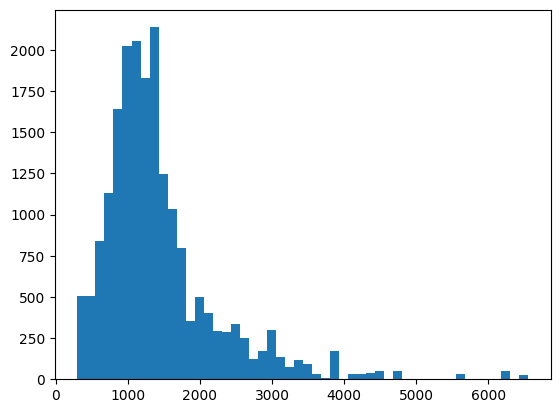

In [25]:
plt.hist(data['Annual_Rainfall'], bins=50)

### Distplot (improved histogram)

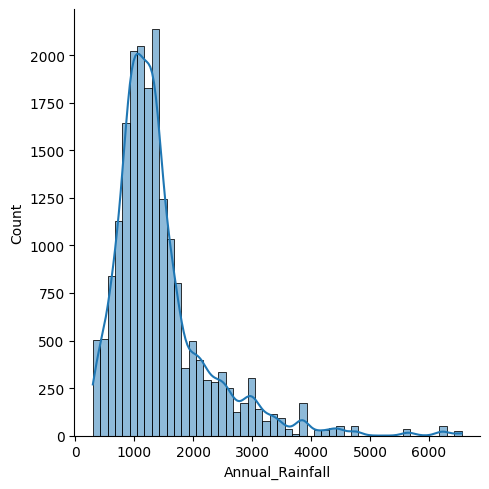

In [26]:
sns.displot(data['Annual_Rainfall'],kde=True, bins=50) #kde, pdf, skewness

In [27]:
data['Annual_Rainfall'].skew()

np.float64(2.1317850114644354)

<Axes: xlabel='Yield', ylabel='Density'>

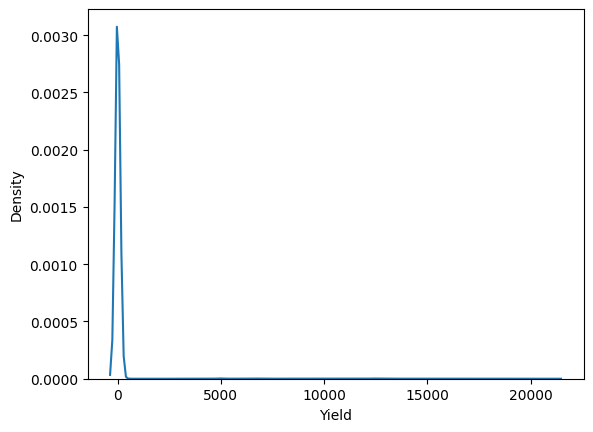

In [28]:
sns.kdeplot(data['Yield'])

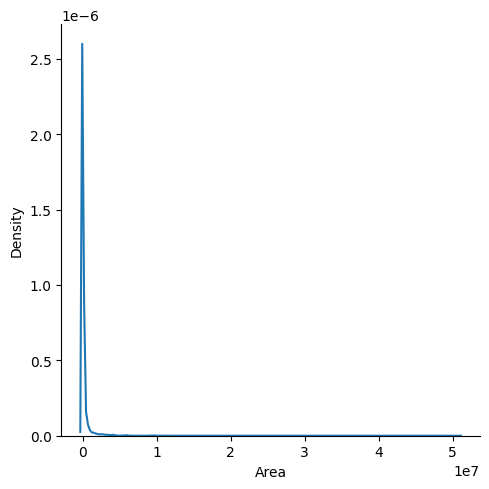

In [29]:
sns.displot(data['Area'], kind = 'kde')

<Axes: xlabel='Production', ylabel='Density'>

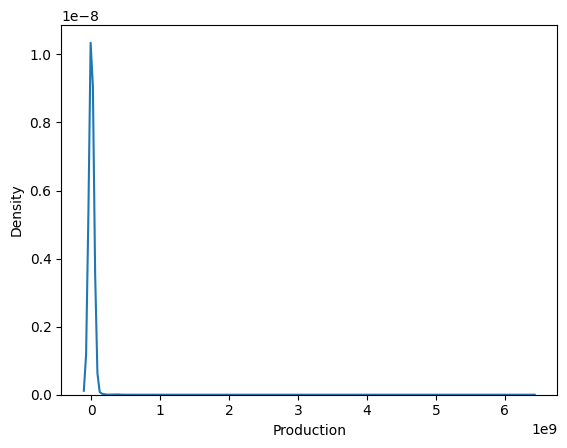

In [30]:
sns.kdeplot(data['Production'])

### Boxplot

<Axes: ylabel='Annual_Rainfall'>

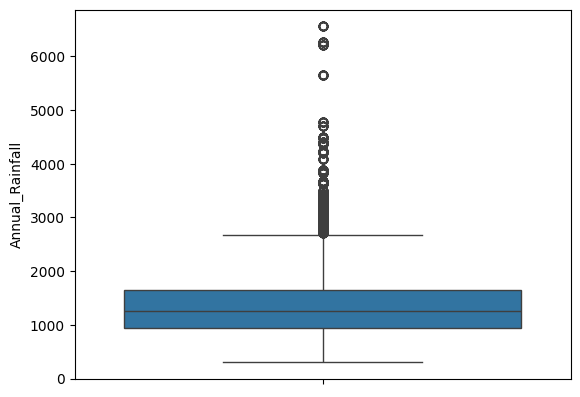

In [31]:
sns.boxplot(data['Annual_Rainfall']) #InterQuartile Range(IQR)

<Axes: ylabel='Area'>

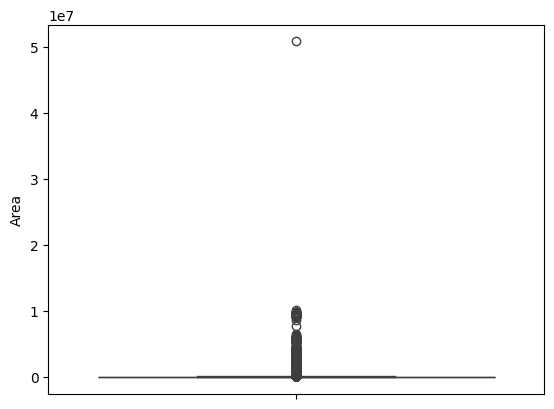

In [32]:
sns.boxplot(data['Area'])

# bivariate and multivariate analysis

In [33]:
data.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## Scatterplot (Numerical-Numerical)

<Axes: xlabel='Area', ylabel='Pesticide'>

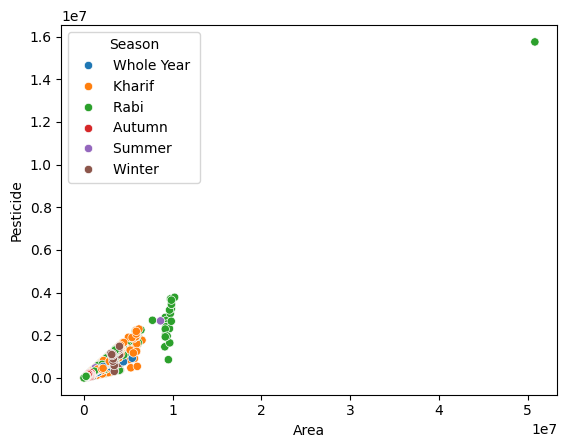

In [34]:
sns.scatterplot(x=data['Area'], y=data['Pesticide'], hue=data['Season'])

<Axes: xlabel='Area', ylabel='Fertilizer'>

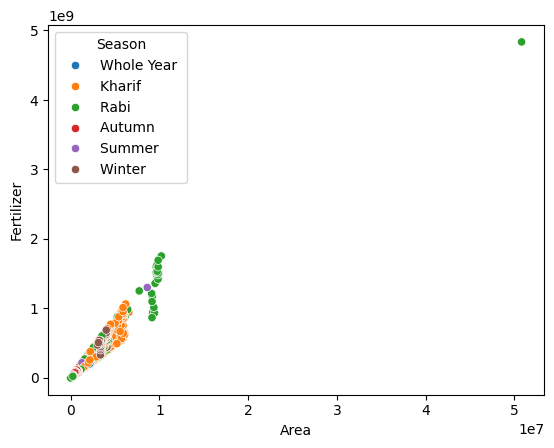

In [35]:
sns.scatterplot(x=data['Area'], y=data['Fertilizer'], hue=data['Season'])

### Insights
- Fertilizer and Pestiside data behaves almost the same

## Bar Plot(Numerical - Categorical)

<Axes: xlabel='State', ylabel='Yield'>

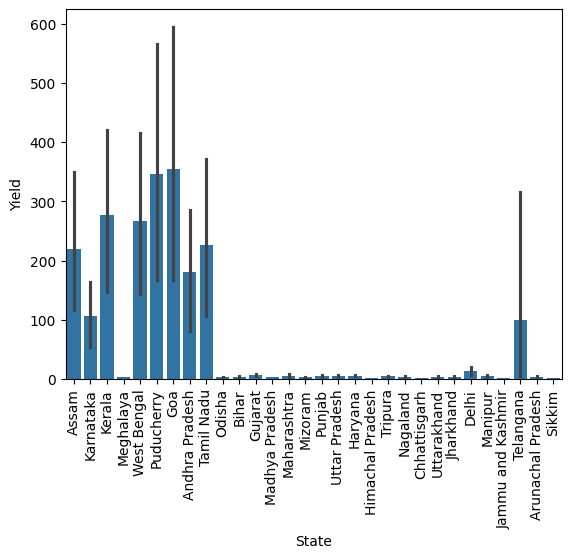

In [36]:
plt.xticks(rotation=90)
sns.barplot(x=data['State'], y=data['Yield'], errorbar=('ci', 99)) #confidence interval

<Axes: xlabel='State', ylabel='Production'>

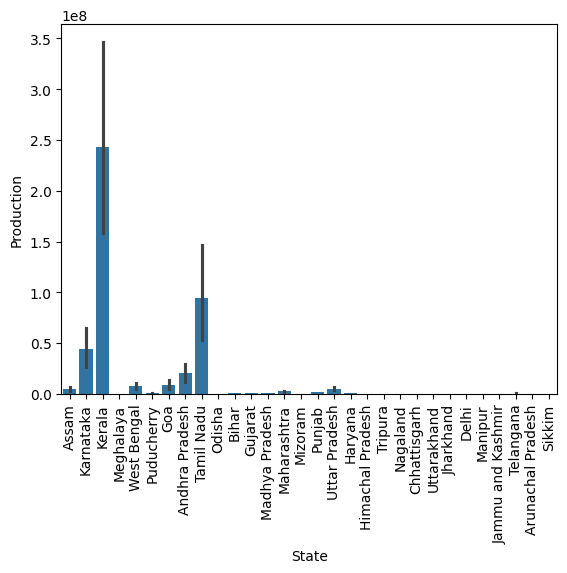

In [37]:
plt.xticks(rotation=90)
sns.barplot(x=data['State'], y=data['Production'])

#### Insights
- Production and Yield of respective States are not inter-related 

<Axes: xlabel='Crop', ylabel='Yield'>

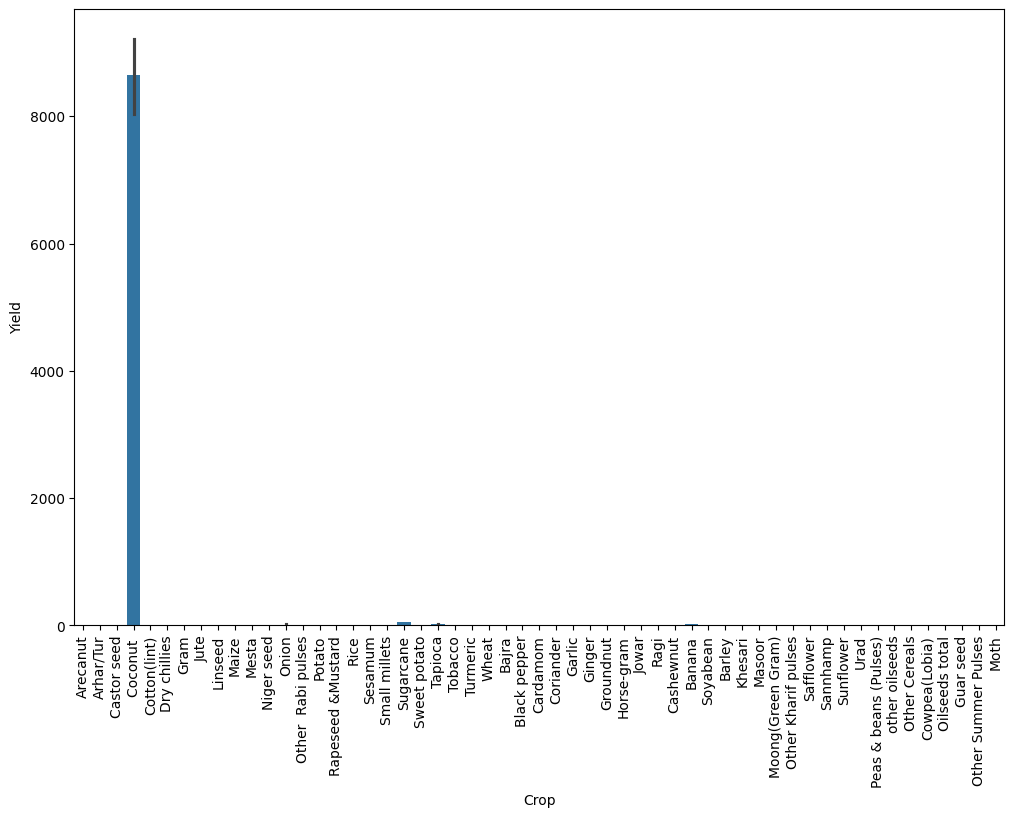

In [38]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x=data['Crop'], y=data['Yield'])

<Axes: xlabel='Season', ylabel='Yield'>

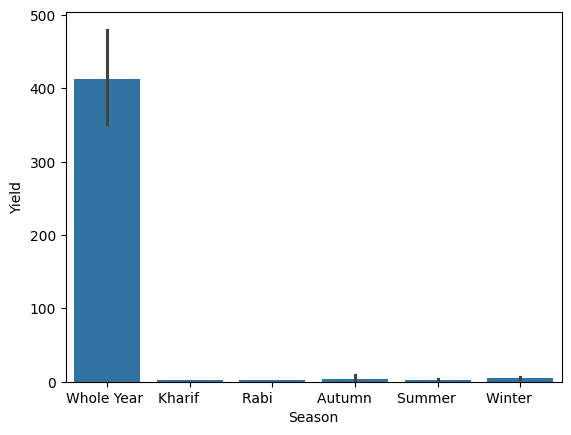

In [39]:
sns.barplot(x=data['Season'], y=data['Yield'])

#### Insights
- Coconut has the highest yield
- Whole Year crops has the highest yield

### Box Plot(Numerical- Categorical)

<Axes: xlabel='State', ylabel='Annual_Rainfall'>

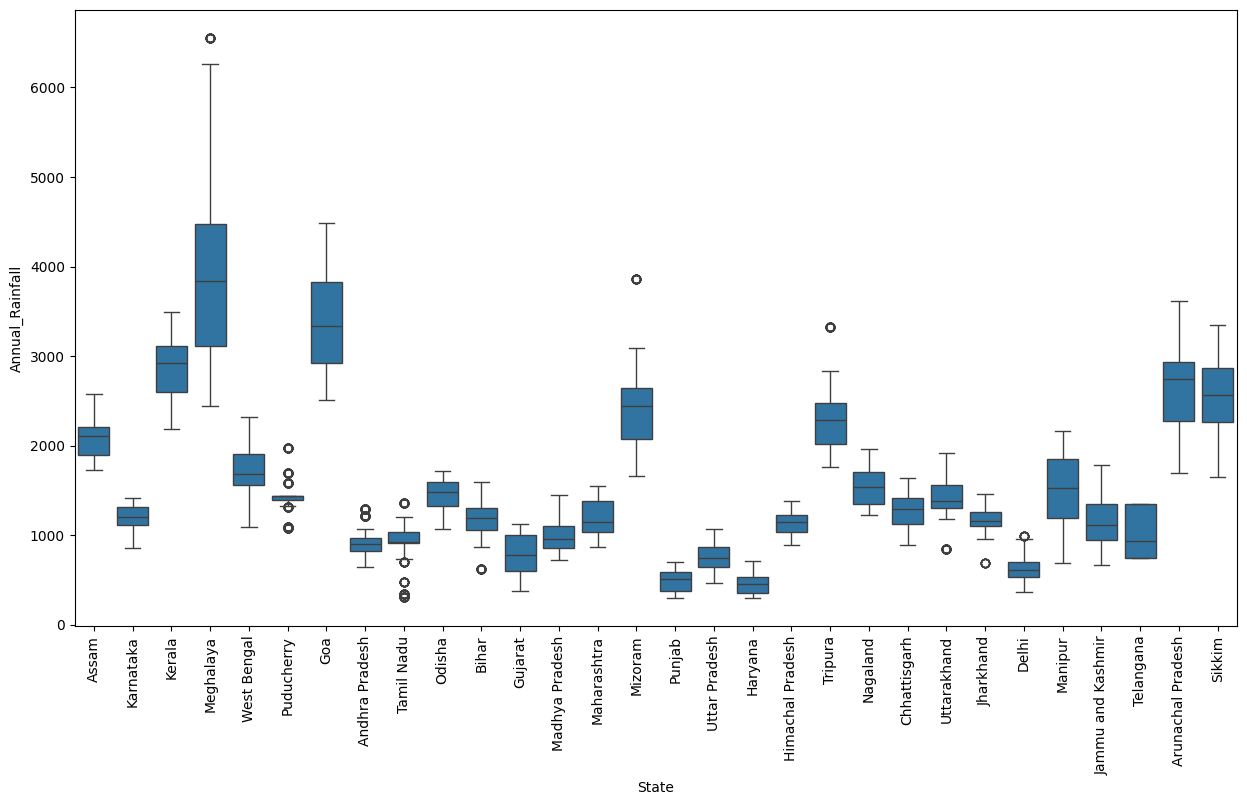

In [40]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(x=data['State'], y=data['Annual_Rainfall'])

### HeatMap and clustermap(C-C)

In [41]:
pd.crosstab(data['State'], data['Crop'])

Crop,Arecanut,Arhar/Tur,Bajra,Banana,Barley,Black pepper,Cardamom,Cashewnut,Castor seed,Coconut,...,Soyabean,Sugarcane,Sunflower,Sweet potato,Tapioca,Tobacco,Turmeric,Urad,Wheat,other oilseeds
State,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,18,41,45,18,0,2,0,19,30,19,...,25,23,35,27,26,32,0,46,24,10
Arunachal Pradesh,0,4,0,0,0,0,0,0,0,0,...,6,23,6,0,0,0,22,8,23,4
Assam,22,23,0,21,0,13,0,0,23,22,...,0,23,0,23,22,23,23,19,23,0
Bihar,0,23,23,10,22,0,0,0,18,0,...,1,21,23,12,0,21,15,22,23,0
Chhattisgarh,0,20,39,0,20,0,0,0,20,7,...,20,21,21,20,0,19,20,40,20,0
Delhi,0,4,22,0,22,0,0,0,0,0,...,0,16,0,0,0,0,0,0,22,0
Goa,13,0,0,13,0,17,0,17,0,17,...,0,22,0,4,0,0,0,0,0,3
Gujarat,0,23,46,22,0,0,0,0,24,0,...,10,23,0,0,0,34,0,33,23,2
Haryana,0,22,23,2,23,0,0,0,14,0,...,2,23,22,14,0,2,12,22,23,9


<Axes: xlabel='Crop', ylabel='State'>

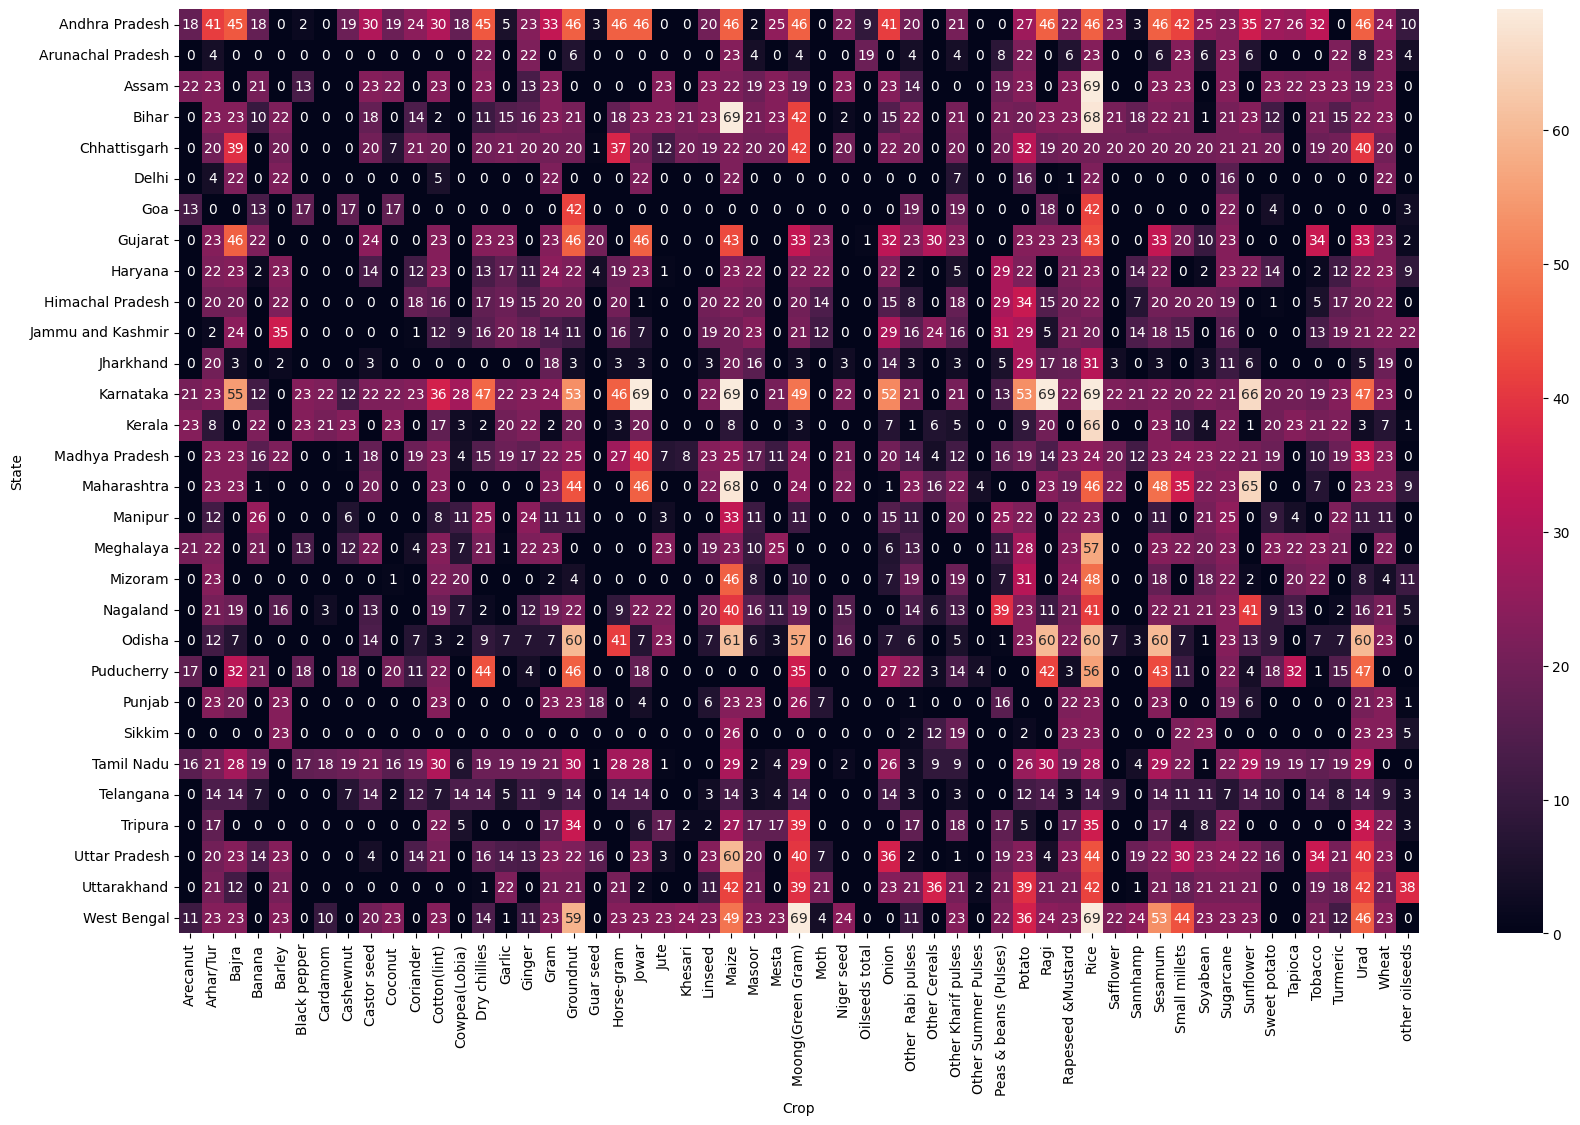

In [42]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data['State'], data['Crop']),annot=True)

<Figure size 800x1200 with 0 Axes>

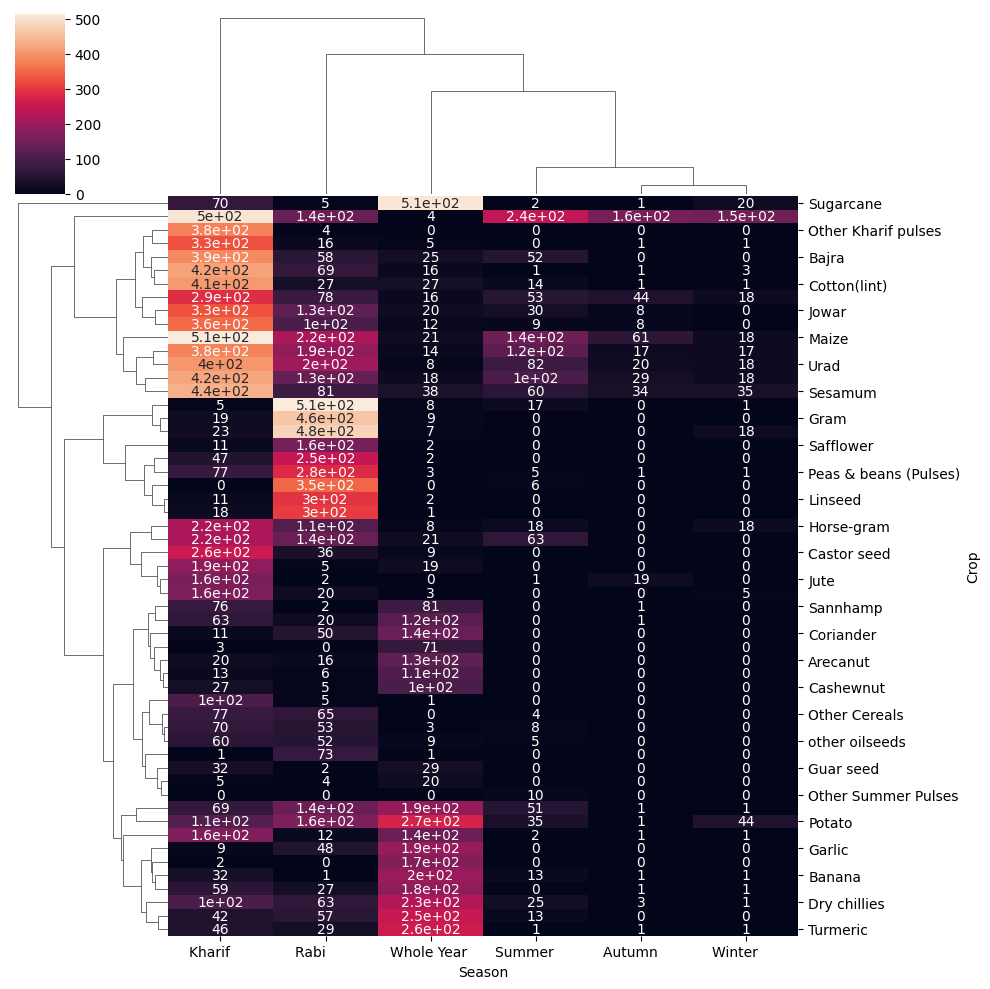

In [43]:
plt.figure(figsize=(8,12))
sns.clustermap(pd.crosstab(data['Crop'],data['Season']), annot=True)

### Pairplot (collection of scatterplots)

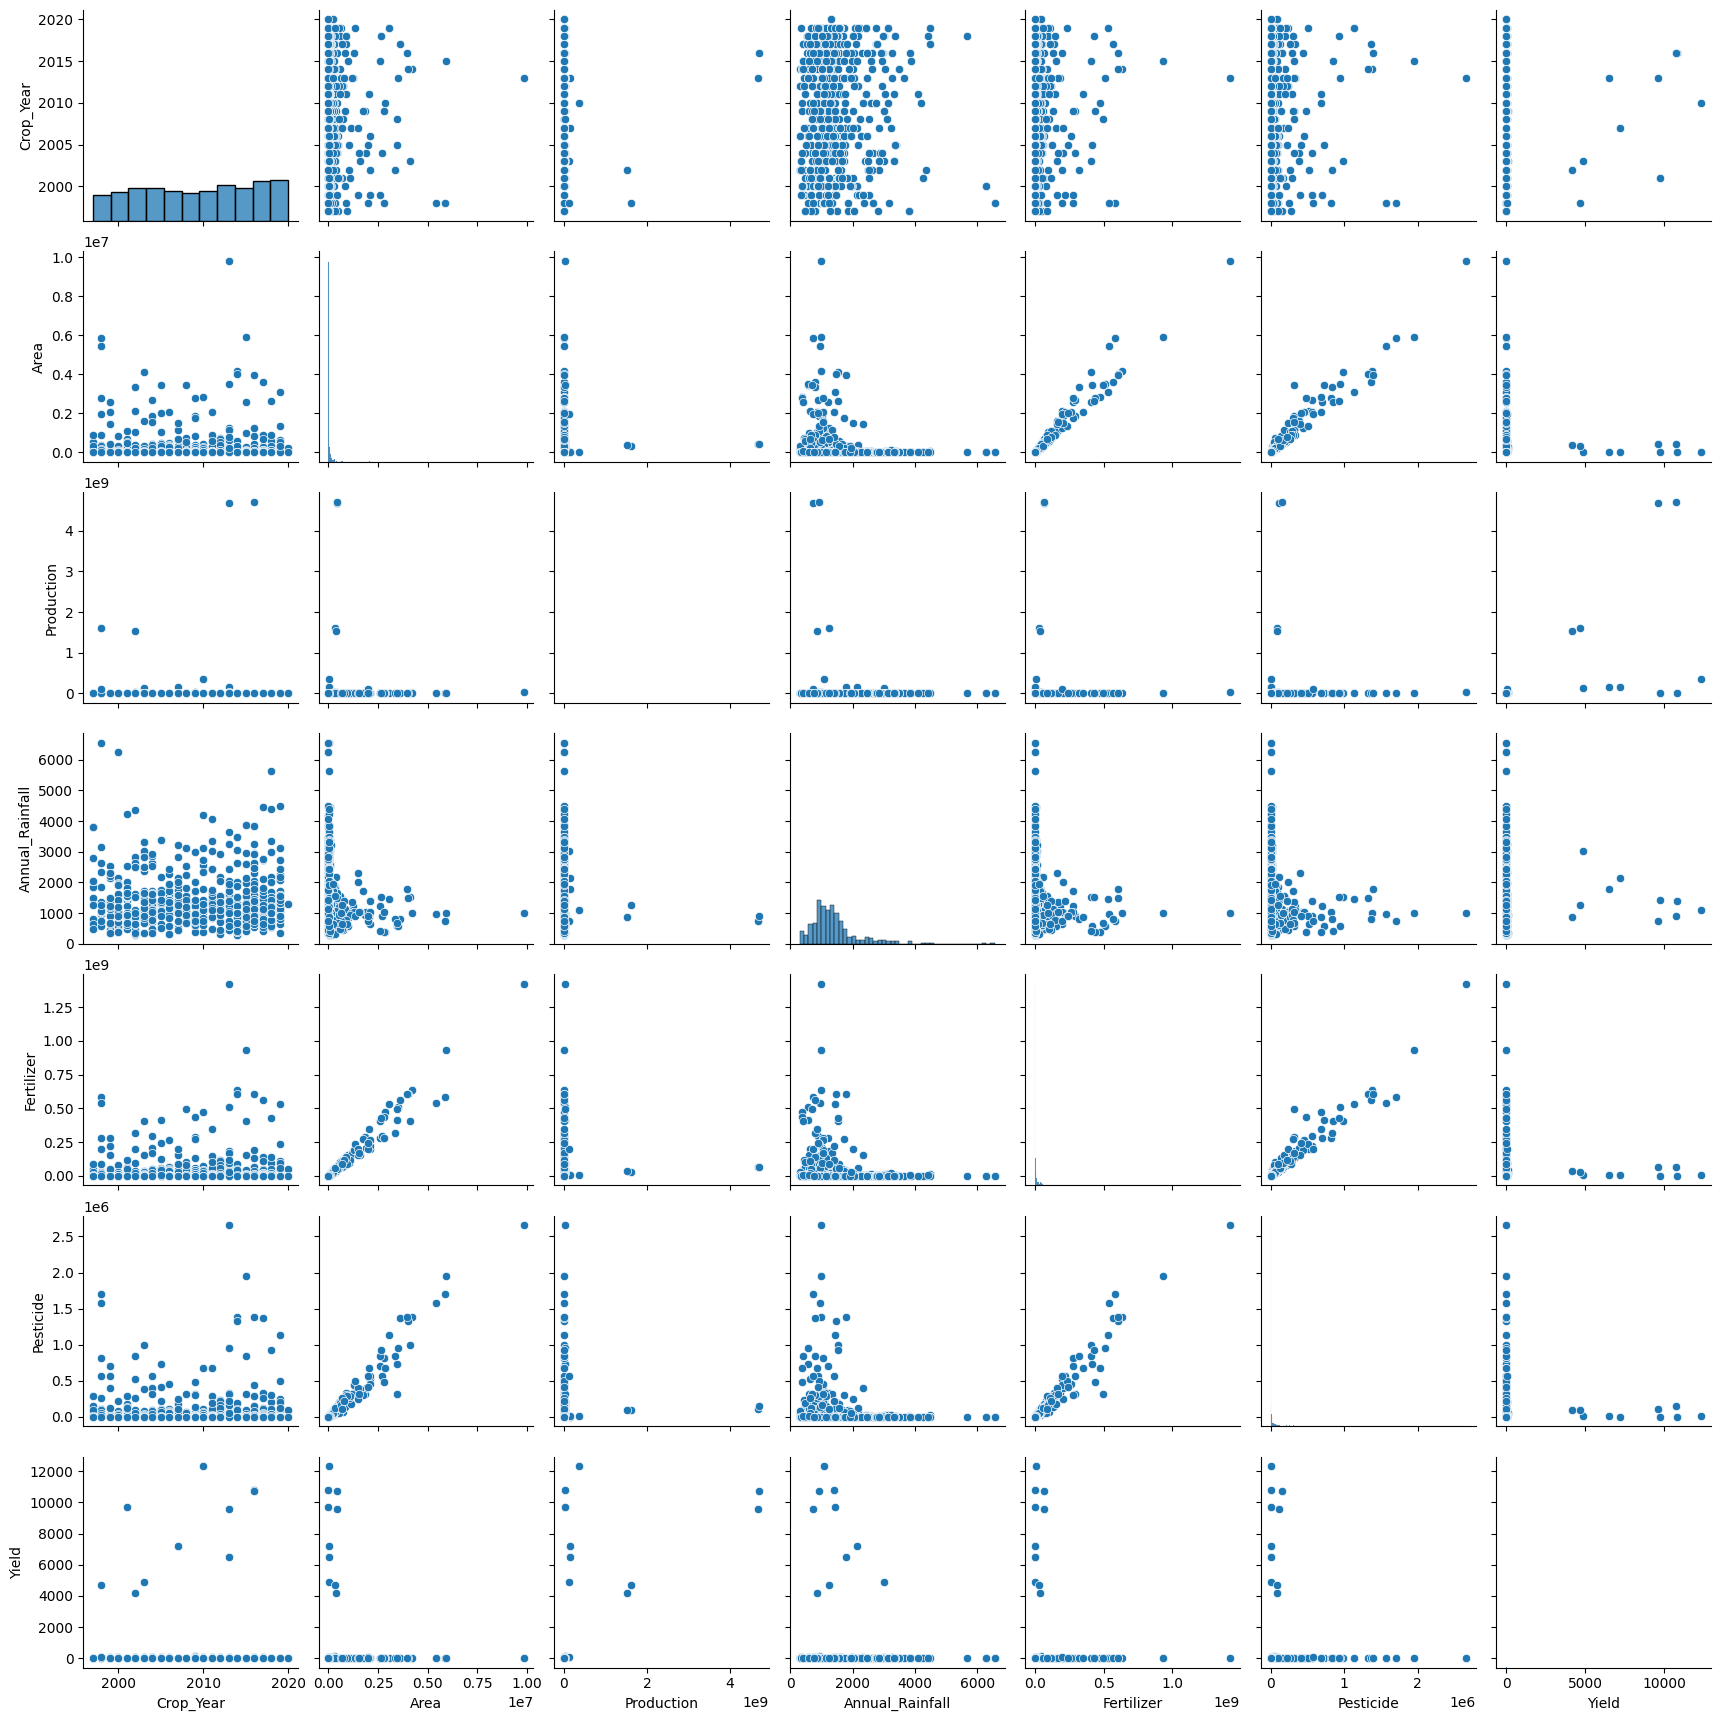

In [44]:
sns.pairplot(data.sample(1000))

### Lineplot(n-n)

In [45]:
crop=data.groupby('Crop_Year').sum().reset_index()

([<matplotlib.axis.XTick at 0x15ead3b32d0>,
 [Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020')])

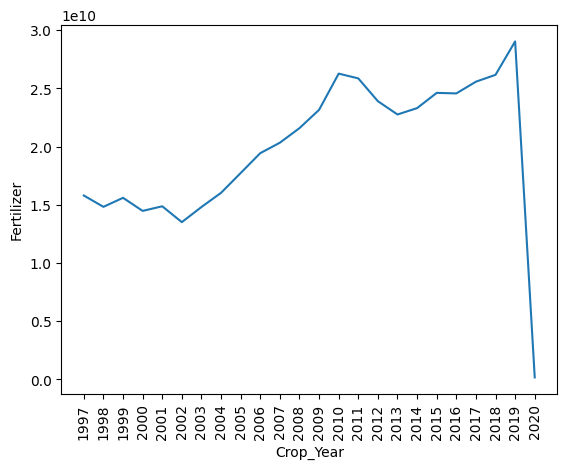

In [46]:
plt.xticks(rotation=90)
sns.lineplot(x=crop['Crop_Year'], y=crop['Fertilizer'])
years = np.unique(crop['Crop_Year'])
plt.xticks(years[::1])

<Axes: xlabel='Crop_Year', ylabel='Pesticide'>

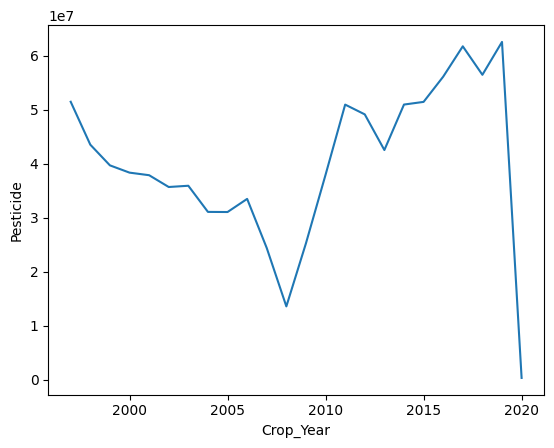

In [47]:
sns.lineplot(x=crop['Crop_Year'], y=crop['Pesticide'])

<Axes: xlabel='Crop_Year', ylabel='Annual_Rainfall'>

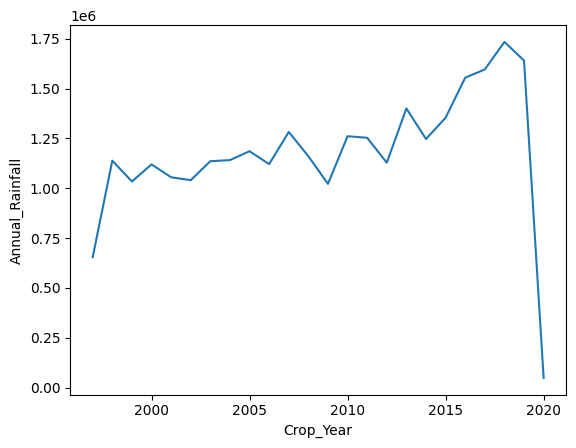

In [48]:
sns.lineplot(x=crop['Crop_Year'], y=crop['Annual_Rainfall'])

<Axes: xlabel='Crop_Year', ylabel='Production'>

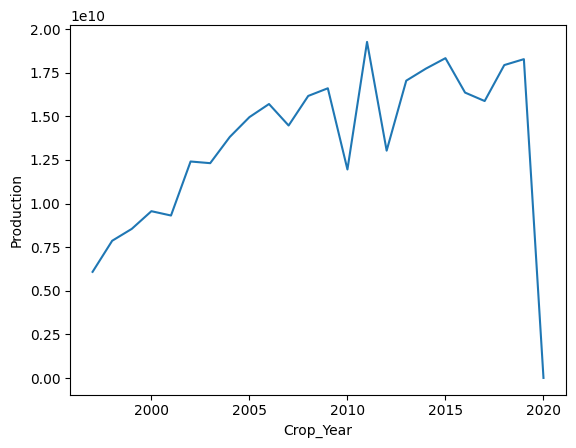

In [49]:
sns.lineplot(x=crop['Crop_Year'], y=crop['Production'])

<Axes: xlabel='Crop_Year', ylabel='Area'>

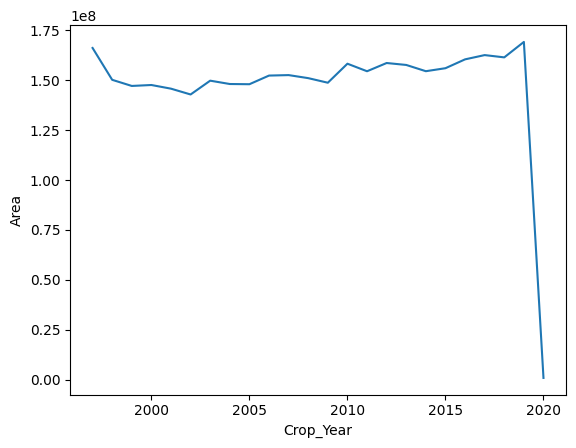

In [50]:
sns.lineplot(x=crop['Crop_Year'], y=crop['Area'])

<Axes: xlabel='Crop_Year', ylabel='Yield'>

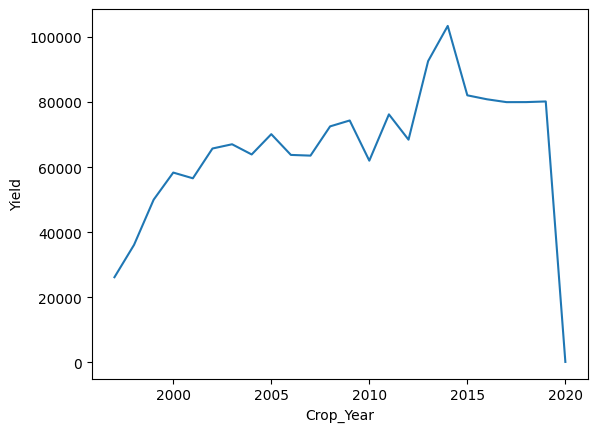

In [51]:
sns.lineplot(x=crop['Crop_Year'], y=crop['Yield'])